In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/content/drive/MyDrive/Unisoft data/data10_tips.csv")
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))


In [29]:
def kernel(point,xmat,k):
  m,n=np.shape(xmat)
  weights=np.mat(np.eye((m)))
  for j in range(m):
    diff=point-X[j]
    weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
  return weights 

In [30]:
def LocalWeight(point,xmat,ymat,k):
  wei=kernel(point,xmat,k)
  W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  return W

In [31]:
def LocalWeightRegression(xmat,ymat,k):
  m,n=np.shape(xmat)
  ypred=np.zeros(m)
  for i in range(m):
    ypred[i]=xmat[i]*LocalWeight(xmat[i],xmat,ymat,k)
  return ypred


In [34]:
def GPlot(X,ypred):
  sortindex=X[:,1].argsort(0)
  xsort=X[sortindex][:,0]
  fig=plt.figure()
  ax=fig.add_subplot(1,1,1)
  ax.scatter(bill,tip,color="green")
  ax.plot(xsort[:,1],ypred[sortindex],color="red",linewidth=5)
  plt.xlabel("Tot Bill")
  plt.ylabel("Tot Tip")
  plt.show()


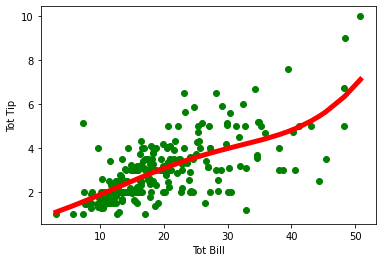

In [35]:
ypred=LocalWeightRegression(X,mtip,8)
GPlot(X,ypred)

Text(0, 0.5, 'Total_Tip')

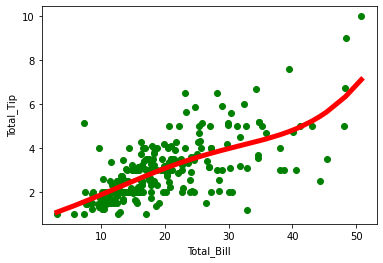

In [33]:
sortindex=X[:,1].argsort(0)
xsort=X[sortindex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[sortindex],color='red',linewidth=5)
plt.xlabel("Total_Bill")
plt.ylabel("Total_Tip")
#plt.show()